In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


In [7]:
# Load dataset
df = pd.read_csv('/content/Iris.csv')

# Show first 5 rows
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


** 2. Normalize Features**

Since KNN uses distances, we need to scale features so that all have the same influence.
We’ll use StandardScaler (mean = 0, standard deviation = 1).

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
df = pd.read_csv("Iris.csv")  # use your actual file name
print(df.head())

# 2. Drop the 'Id' column (not useful for classification)
df = df.drop('Id', axis=1)

# 3. Separate features and target
X = df.drop('Species', axis=1)
y = df['Species']

# 4. Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Before Scaling:\n", X.head())
print("\nAfter Scaling:\n", X_scaled[:5])

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Before Scaling:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

After Scaling:
 [[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.3

Step 2: Train KNN on Your Dataset

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



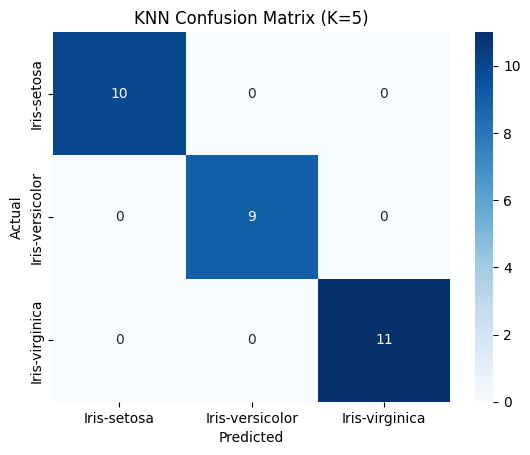

In [15]:
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# 1. Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 2. Create KNN model (let's start with K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# 3. Train the model
knn.fit(X_train, y_train)

# 4. Make predictions
y_pred = knn.predict(X_test)

# 5. Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 6. Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',
            cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix (K=5)")
plt.show()

What This Does

* the normalized data into 80% train / 20% test

* Trains a KNN classifier with n_neighbors=5

* Predicts the species for the test set

* Evaluates using:

* Accuracy score

*  Classification report (precision, recall, F1-score)

* Confusion matrix heatmap

**Step 3: Experiment with Different K Values**


K=1: Accuracy=0.9667
K=2: Accuracy=1.0000
K=3: Accuracy=1.0000
K=4: Accuracy=1.0000
K=5: Accuracy=1.0000
K=6: Accuracy=1.0000
K=7: Accuracy=1.0000
K=8: Accuracy=1.0000
K=9: Accuracy=1.0000
K=10: Accuracy=1.0000
K=11: Accuracy=1.0000
K=12: Accuracy=1.0000
K=13: Accuracy=1.0000
K=14: Accuracy=1.0000
K=15: Accuracy=1.0000


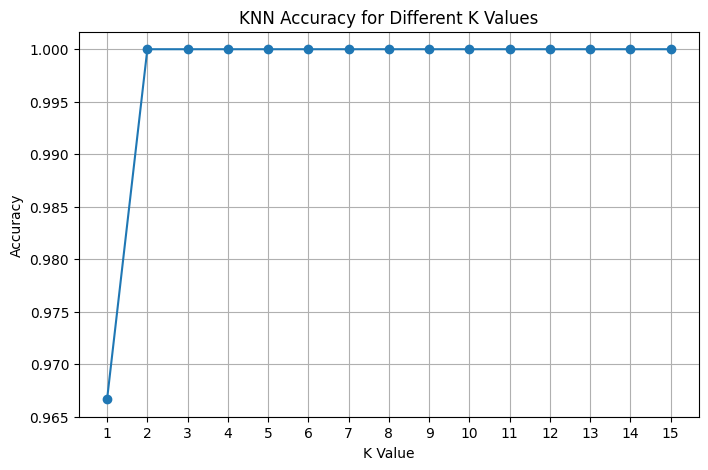


Best K value: 2 with Accuracy=1.0000


In [16]:
# Test K values from 1 to 15
k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)
    print(f"K={k}: Accuracy={acc:.4f}")

# Plot accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different K Values")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find best K
best_k = k_values[accuracies.index(max(accuracies))]
print(f"\nBest K value: {best_k} with Accuracy={max(accuracies):.4f}")

**Step 4: Final Model Evaluation**

Final Model Accuracy (K=2): 1.0000

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



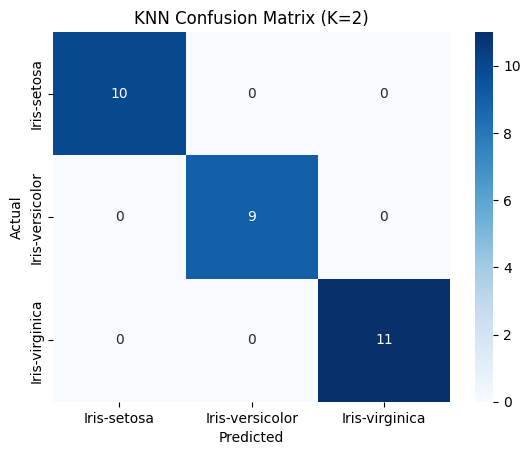

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train KNN with best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predictions
y_pred_best = knn_best.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Final Model Accuracy (K={best_k}): {accuracy:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d',
            cmap='Blues', xticklabels=knn_best.classes_, yticklabels=knn_best.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"KNN Confusion Matrix (K={best_k})")
plt.show()

What This Gives You

* Final accuracy for your chosen K

* Classification report (precision, recall, F1-score)

* Confusion matrix heatmap for easy visual interpretation

**Step 5: Decision Boundary Visualization (2 Features)**

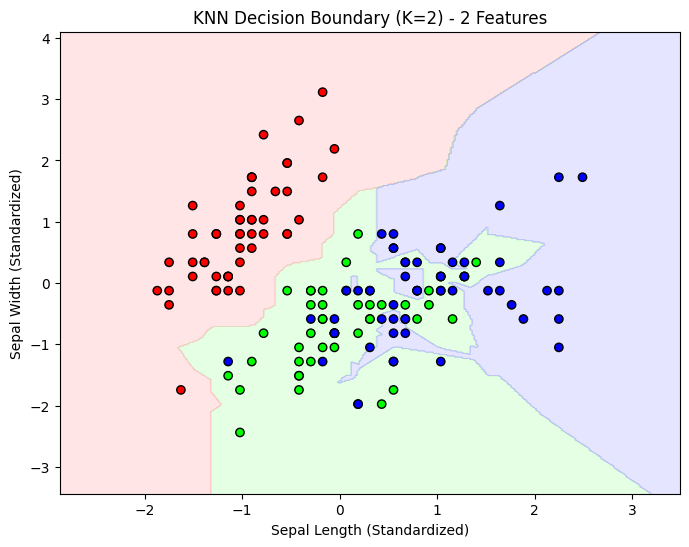

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Select only first two features for visualization
X_vis = X_scaled[:, :2]  # SepalLengthCm, SepalWidthCm
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

# Train KNN with best K on 2D data
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Create a mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict for each point in the grid
Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])

# Convert string predictions to integers for plotting
# Ensure y is a numpy array before factorizing
y_np = y.to_numpy()
Z = pd.factorize(Z, sort=True)[0].reshape(xx.shape)


# Plot decision boundary
plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=pd.factorize(y_np, sort=True)[0], edgecolor='k', cmap=cmap_bold)
plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Sepal Width (Standardized)")
plt.title(f"KNN Decision Boundary (K={best_k}) - 2 Features")
plt.show()

How This Works
* Select only two features for easy plotting

* Train KNN on these two features

* Create a mesh grid to cover the feature space

* Predict the class for each grid point

* Color the regions to show decision boundaries

* Overlay actual data points for reference

